# PRUEBAS
_________________

## 1. Librerías requeridas para el análisis (* Import *)
_________

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime

import plotly.express as px 

## 2. Carga de datos inicial, de la fuente, en el dataframe        

____________

In [82]:
dset = pd.DataFrame({'COD': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] , 
                    "PAIS": ["ESP","ITA","FRA","USA","FRA","USA","FRA","USA","ITA","FRA","ESP", "ESP", "ESP", "USA", "USA","MEX"],
                    "EXP":  ["S","I","J","S","S","I","S","S","S","J","J","J","J","I","I",None],
                     'SAL': [100,102,300,45,590,60,70,8000,90,100,101,1200,130,540,150,1160],
                     'TOOLS': ["PYTHON, SQL, ML, SPARK","SQL,AGILE,SCRUM,ORACLE,HADOOP", 
                            "PYTHON,SQL,TENSORFLOW,ML","SQL,ML,R,AGILE",
                            "PYTHON, SQL, ML, SPARK","SQL,AGILE,SCRUM,ORACLE,HADOOP", 
                            "PYTHON,SQL,BO,ML","SQL,ML,R,AGILE",
                            "PYTHON, MICROSTRATEGY, ML, SPARK","SQL,POWERBI,SCRUM,ORACLE,HADOOP", 
                            "PYTHON,SQL,TENSORFLOW,ML","SQL,ML,R,POWERBI",
                            "PYTHON, BO, ML, SPARK","PANDAS,AGILE,SCRUM,ORACLE,HADOOP", 
                            "JSON,SQL,TENSORFLOW,ML", "SQL,PANDAS,CRM,PYTHON"]})


## 4. Análisis de tendencias en los datos (EDA)
________________

In [83]:
dset

,COD,PAIS,EXP,SAL,TOOLS
0,1,ESP,S,100,"PYTHON, SQL, ML, SPARK"
1,2,ITA,I,102,"SQL,AGILE,SCRUM,ORACLE,HADOOP"
2,3,FRA,J,300,"PYTHON,SQL,TENSORFLOW,ML"
3,4,USA,S,45,"SQL,ML,R,AGILE"
4,5,FRA,S,590,"PYTHON, SQL, ML, SPARK"
5,6,USA,I,60,"SQL,AGILE,SCRUM,ORACLE,HADOOP"
6,7,FRA,S,70,"PYTHON,SQL,BO,ML"
7,8,USA,S,8000,"SQL,ML,R,AGILE"
8,9,ITA,S,90,"PYTHON, MICROSTRATEGY, ML, SPARK"
9,10,FRA,J,100,"SQL,POWERBI,SCRUM,ORACLE,HADOOP"


In [84]:
df = dset.groupby(['PAIS', 'EXP']).agg({'COD':['size'], 'SAL':['min','max','mean']})
df.reset_index(inplace=True)
df.columns = ['PAIS','EXP','size','Sal_min', 'Sal_max', 'Sal_mean']

In [85]:
df

,PAIS,EXP,size,Sal_min,Sal_max,Sal_mean
0,ESP,J,3,101,1200,477.0
1,ESP,S,1,100,100,100.0
2,FRA,J,2,100,300,200.0
3,FRA,S,2,70,590,330.0
4,ITA,I,1,102,102,102.0
5,ITA,S,1,90,90,90.0
6,USA,I,3,60,540,250.0
7,USA,S,2,45,8000,4022.5


In [118]:
tools_df=dset.groupby(['PAIS', 'EXP','TOOLS']).count()
tools_df.reset_index(inplace=True)


In [120]:
tools_df

,PAIS,EXP,TOOLS,COD,SAL
0,ESP,J,"PYTHON, BO, ML, SPARK",1,1
1,ESP,J,"PYTHON,SQL,TENSORFLOW,ML",1,1
2,ESP,J,"SQL,ML,R,POWERBI",1,1
3,ESP,S,"PYTHON, SQL, ML, SPARK",1,1
4,FRA,J,"PYTHON,SQL,TENSORFLOW,ML",1,1
5,FRA,J,"SQL,POWERBI,SCRUM,ORACLE,HADOOP",1,1
6,FRA,S,"PYTHON, SQL, ML, SPARK",1,1
7,FRA,S,"PYTHON,SQL,BO,ML",1,1
8,ITA,I,"SQL,AGILE,SCRUM,ORACLE,HADOOP",1,1
9,ITA,S,"PYTHON, MICROSTRATEGY, ML, SPARK",1,1


In [121]:
tools_df["PYTHON"]= tools_df.groupby(['PAIS', 'EXP'])['TOOLS'].transform (lambda x: x[x.str.contains('PYTHON')].count()) 

In [122]:
tools_df["SQL"]= tools_df.groupby(['PAIS', 'EXP'])['TOOLS'].transform (lambda x: x[x.str.contains('SQL')].count()) 
tools_df["ML"]= tools_df.groupby(['PAIS', 'EXP'])['TOOLS'].transform (lambda x: x[x.str.contains('ML')].count()) 
tools_df["AGILE"]= tools_df.groupby(['PAIS', 'EXP'])['TOOLS'].transform (lambda x: x[x.str.contains('AGILE')].count()) 
tools_df["POWERBI"]= tools_df.groupby(['PAIS', 'EXP'])['TOOLS'].transform (lambda x: x[x.str.contains('POWERBI')].count())  

In [123]:
tools_df

,PAIS,EXP,TOOLS,COD,SAL,PYTHON,SQL,ML,AGILE,POWERBI
0,ESP,J,"PYTHON, BO, ML, SPARK",1,1,2,2,3,0,1
1,ESP,J,"PYTHON,SQL,TENSORFLOW,ML",1,1,2,2,3,0,1
2,ESP,J,"SQL,ML,R,POWERBI",1,1,2,2,3,0,1
3,ESP,S,"PYTHON, SQL, ML, SPARK",1,1,1,1,1,0,0
4,FRA,J,"PYTHON,SQL,TENSORFLOW,ML",1,1,1,2,1,0,1
5,FRA,J,"SQL,POWERBI,SCRUM,ORACLE,HADOOP",1,1,1,2,1,0,1
6,FRA,S,"PYTHON, SQL, ML, SPARK",1,1,2,2,2,0,0
7,FRA,S,"PYTHON,SQL,BO,ML",1,1,2,2,2,0,0
8,ITA,I,"SQL,AGILE,SCRUM,ORACLE,HADOOP",1,1,0,1,0,1,0
9,ITA,S,"PYTHON, MICROSTRATEGY, ML, SPARK",1,1,1,0,1,0,0


In [124]:
tools_df.drop(columns=["TOOLS",'COD','SAL'], inplace=True)

In [125]:
tools_df.drop_duplicates(inplace=True)

In [126]:
tools_df

,PAIS,EXP,PYTHON,SQL,ML,AGILE,POWERBI
0,ESP,J,2,2,3,0,1
3,ESP,S,1,1,1,0,0
4,FRA,J,1,2,1,0,1
6,FRA,S,2,2,2,0,0
8,ITA,I,0,1,0,1,0
9,ITA,S,1,0,1,0,0
10,USA,I,0,2,1,2,0
13,USA,S,0,1,1,1,0


In [127]:
final_df = pd.merge(df,tools_df,on=['PAIS','EXP'], how = 'left')

In [128]:
final_df

,PAIS,EXP,size,Sal_min,Sal_max,Sal_mean,PYTHON,SQL,ML,AGILE,POWERBI
0,ESP,J,3,101,1200,477.0,2,2,3,0,1
1,ESP,S,1,100,100,100.0,1,1,1,0,0
2,FRA,J,2,100,300,200.0,1,2,1,0,1
3,FRA,S,2,70,590,330.0,2,2,2,0,0
4,ITA,I,1,102,102,102.0,0,1,0,1,0
5,ITA,S,1,90,90,90.0,1,0,1,0,0
6,USA,I,3,60,540,250.0,0,2,1,2,0
7,USA,S,2,45,8000,4022.5,0,1,1,1,0


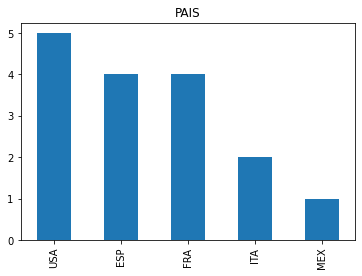

In [11]:
dset['PAIS'].value_counts().plot(kind='bar', 
                                     title='PAIS')

In [80]:

fig = px.bar(df,x = "EXP" , y= "size" , color= "PAIS", barmode= "group")
fig.show()

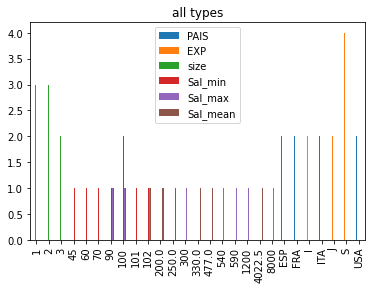

In [15]:
df.apply(pd.value_counts).plot(kind='bar', title='all types')

### PIE CHARTS

### GRÁFICOS P

###   ANÁLISIS POR 